# Eigenvalue Problem

Eigenvalue problem blabla

Unfortunately, we found tensorflow objects (such as tensorflow functions) hard to reuse. There is therefore much repetitive code in the code cells below. This notebook is organized such that each code cell have all the necessary code, except imports, to solve a particular problem. To better distinguish what problem a particular code cell solves, we have added headers and a small discussion before and after the code that explains the problem at hand. 

### Configure notebook

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import os
import sys
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np

# Import code from src
sys.path.insert(0, '../src/')
from tools import fig_path

tf.keras.backend.set_floatx("float64")
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

# Set fontsizes in figures
params = {'legend.fontsize': 'large',
          'axes.labelsize': 'large',
          'axes.titlesize': 'large',
          'xtick.labelsize': 'large',
          'ytick.labelsize': 'large',
          'legend.fontsize': 'large',
          'legend.handlelength': 2}
plt.rcParams.update(params)

## Euler's method

ODE RHS, two alternatives, benchmark which gives best result with Euler's method

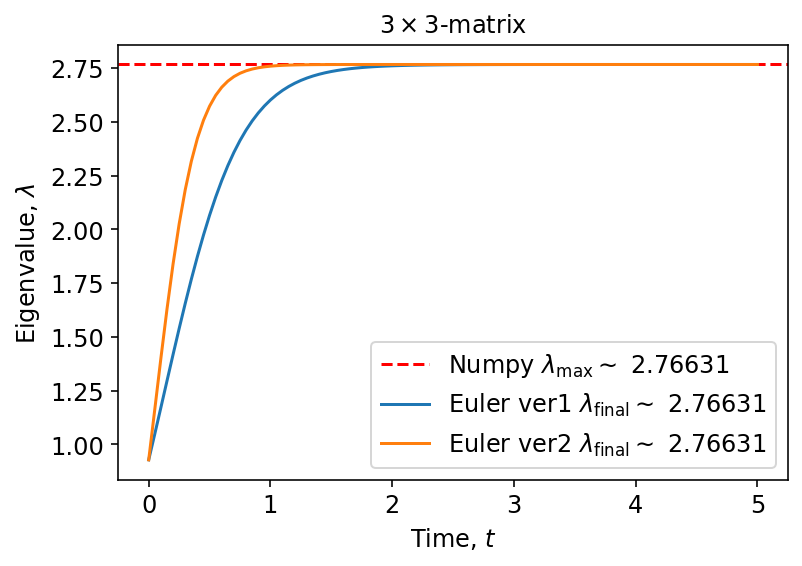

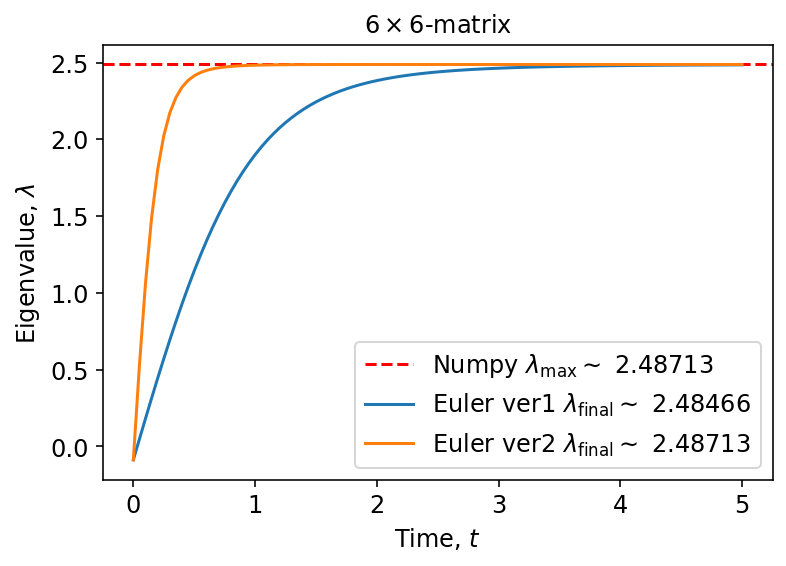

In [11]:
def ode_rhs_ver1(A, x):
    return (x.T@x) * A@x - (x.T@A@x) * x

def ode_rhs_ver2(A, x):
    return A@x - (x.T@x) * x

def euler_eig(A, x0, T, N, ver='ver1'):
    """
    Euler's method for computing eigenvalue
    """
    dt = T / N
    x = [x0]
    for i in range(N - 1):
        if ver == 'ver1':
            x.append(x[-1] + dt * ode_rhs_ver1(A, x[-1]))
        elif ver == 'ver2': 
            x.append(x[-1] + dt * ode_rhs_ver2(A, x[-1]))
    x = np.array(x)
    x = x / np.sqrt(np.einsum("ij,ij->i", x, x)[:, np.newaxis])
    return np.einsum("ij,ij->i", x @ A, x)

N = 101    # number of timesteps
T = 5     # final time

# Benchmark problem, 3x3 matrix
A = np.random.normal(0, 1, (3, 3))
A = (A.T + A) * 0.5    
x0 = np.random.rand(3)
x0 = x0 / np.linalg.norm(x0, ord=1)
t1 = np.linspace(0, T, N)
eig_euler_v1_1 = euler_eig(A, x0, T, N, ver='ver1')
eig_euler_v2_1 = euler_eig(A, x0, T, N, ver='ver2')
v1, w1 = np.linalg.eig(A)

# Benchmark problem, 6x6 matrix
A = np.random.normal(0, 1, (6, 6))
A = (A.T + A) * 0.5    
x0 = np.random.rand(6)
x0 = x0 / np.linalg.norm(x0, ord=1)
t2 = np.linspace(0, T, N)
eig_euler_v1_2 = euler_eig(A, x0, T, N, ver='ver1')
eig_euler_v2_2 = euler_eig(A, x0, T, N, ver='ver2')
v2, w2 = np.linalg.eig(A)


fig1, ax1 = plt.subplots(figsize=(6, 4))
ax1.axhline(np.max(v1), color='red', ls='--')
ax1.plot(t1, eig_euler_v1_1)
ax1.plot(t1, eig_euler_v2_1)
ax1.set_xlabel('Time, $t$')
ax1.set_ylabel('Eigenvalue, $\\lambda$')
ax1.set_title('$3 \\times 3$-matrix')
lgd_numpy = "Numpy $\\lambda_{\\mathrm{max}} \\sim$ " + str(round(np.max(v1), 5))
lgd_euler1 = "Euler ver1 $\\lambda_{\\mathrm{final}} \\sim$ " + str(round(eig_euler_v1_1[-1], 5))
lgd_euler2 = "Euler ver2 $\\lambda_{\\mathrm{final}} \\sim$ " + str(round(eig_euler_v2_1[-1], 5))
ax1.legend([lgd_numpy, lgd_euler1, lgd_euler2], loc='best')
fig1.savefig(fig_path("euler_benchmark_33.pdf"), bbox_inches='tight')

fig2, ax2 = plt.subplots(figsize=(6, 4))
ax2.axhline(np.max(v2), color='red', ls='--')
ax2.plot(t2, eig_euler_v1_2)
ax2.plot(t2, eig_euler_v2_2)
ax2.set_xlabel('Time, $t$')
ax2.set_ylabel('Eigenvalue, $\\lambda$')
ax2.set_title('$6 \\times 6$-matrix')
lgd_numpy = "Numpy $\\lambda_{\\mathrm{max}} \\sim$ " + str(round(np.max(v2), 5))
lgd_euler1 = "Euler ver1 $\\lambda_{\\mathrm{final}} \\sim$ " + str(round(eig_euler_v1_2[-1], 5))
lgd_euler2 = "Euler ver2 $\\lambda_{\\mathrm{final}} \\sim$ " + str(round(eig_euler_v2_2[-1], 5))
ax2.legend([lgd_numpy, lgd_euler1, lgd_euler2], loc='best')
fig2.savefig(fig_path("euler_benchmark_66.pdf"), bbox_inches='tight')

plt.show()

From the figures it seems like ODE RHS ver1 converges somewhat slower than ver2 in the 3x3 case. In the 6x6 case, however, ver1 often struggles to converge as good as ver2. Both these 'problems' probably arises because ver1 is more computationally demanding than ver2.

## FFNN Benchmark Problem

Step: 1, Loss: 89.13583639922999
Step: 100, Loss: 1.1809923546542314
Step: 200, Loss: 1.1673356021031902
Step: 300, Loss: 1.1324087378216372
Step: 400, Loss: 0.940928062429167
Step: 500, Loss: 0.2410794296055852
Step: 600, Loss: 0.09110684079782563
Step: 700, Loss: 0.05764153774993817
Step: 800, Loss: 0.043247064692117074
Step: 900, Loss: 0.0341940655264906
Step: 1000, Loss: 0.029084728301977034
Step: 1100, Loss: 0.02529266380613726
Step: 1200, Loss: 0.022223597651815915
Step: 1300, Loss: 0.019407656884962363
Step: 1400, Loss: 0.016808950545113006
Step: 1500, Loss: 0.014227586970184775

A = [[3. 2. 4.]
 [2. 0. 2.]
 [4. 2. 3.]]
x0 = [1 0 0]
Eigvals Numpy: [-1.  8. -1.]
Max Eigval Numpy 8.0
Final Eigval Euler 7.999999884131663
Final Eigval FFNN 7.999994245949094


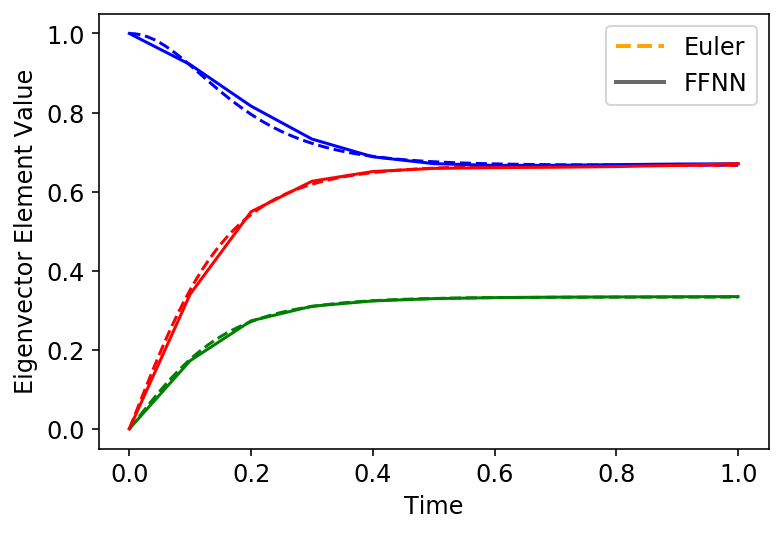

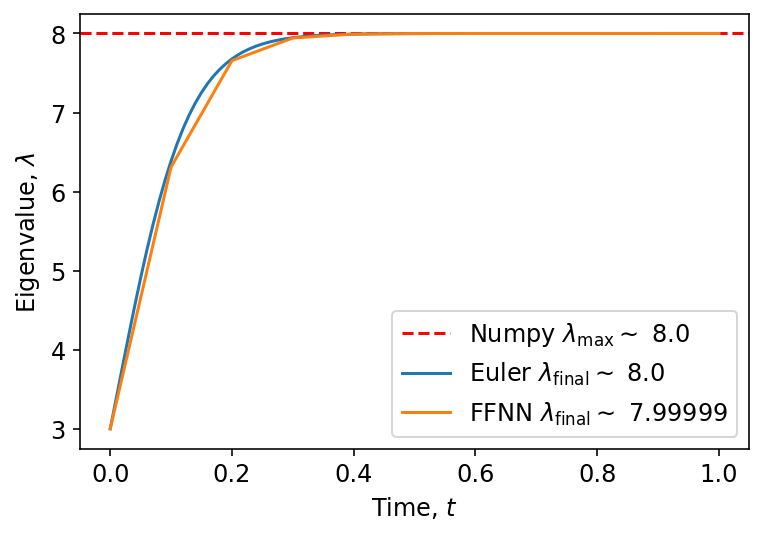

In [17]:
# Define trial solution, ODE rhs, loss function, and gradient method
@tf.function
def trial_solution(model, x0, t):
    return tf.einsum('i...,j->ij', (1 + t), x0) + tf.einsum('i...,ij->ij', t, model(t))   

@tf.function
def rhs(model, A, x0, t):
    #A = tf.cast(A, tf.float32)
    g = trial_solution(model, x0, t)
    return tf.einsum('ij,ij,kl,il->ik', g, g, A, g) - tf.einsum('ij,jk,ik,il->il', g, A, g, g)

@tf.function
def loss(model, A, x0, t):
    with tf.GradientTape() as tape:
        tape.watch(t)
        trial = trial_solution(model, x0, t)
    d_trial_dt = tape.batch_jacobian(trial, t)
    d_trial_dt = d_trial_dt[:, :, 0]
    return tf.losses.MSE(d_trial_dt, rhs(model, A, x0, t))
    #return tf.losses.MSE(tf.zeros_like(d_trial_dt), d_trial_dt - rhs(model, A, x0, t))

@tf.function
def grad(model, A, x0, t):
    with tf.GradientTape() as tape:
        loss_value = loss(model, A, x0, t)
    return loss_value, tape.gradient(loss_value, model.trainable_variables)

# Define Rayleigh quotient
def ray_quo(A, x):
    x = x / tf.sqrt(tf.einsum("ij,ij->i", x, x)[:, tf.newaxis])
    return tf.einsum("ij,ij->i", tf.matmul(x, A), x)

# Define Euler's method
def euler(A, x0, T, N=10001):
    dt = T / N
    x = [x0]
    for i in range(N - 1):
        x.append(x[-1] + dt * (A@x[-1] - (x[-1].T@x[-1]) * x[-1]))
    x = np.array(x)
    def euler_solution(t):
        return x[(t * (N - 1)).astype(int), :]
    return euler_solution

def euler_eig(A, x0, T, N):
    dt = T / N
    x = [x0]
    for i in range(N - 1):
        x.append(x[-1] + dt * (A @ x[-1] - (x[-1].T @ x[-1]) * x[-1]))
        # x.append(x[-1] + dt * ((x[-1].T @ x[-1]) * A @
        #                       x[-1] - (x[-1].T @ A) @ x[-1] * x[-1]))

    x = np.array(x)
    x = x / np.sqrt(np.einsum("ij,ij->i", x, x)[:, np.newaxis])
    eig = np.einsum("ij,ij->i", x @ A, x)

    return x, eig

# Define model
class DNModel(tf.keras.Model):
    def __init__(self, n):
        super(DNModel, self).__init__()

        self.dense_1 = tf.keras.layers.Dense(100, activation=tf.nn.sigmoid)
        self.dense_2 = tf.keras.layers.Dense(50, activation=tf.nn.relu)
        self.dense_3 = tf.keras.layers.Dense(25, activation=tf.nn.sigmoid)
        self.out = tf.keras.layers.Dense(n, name="output")

    def call(self, inputs):
        x = self.dense_1(inputs)
        x = self.dense_2(x)
        x = self.dense_3(x)
        return self.out(x)

# Define problem
n = 3    # Dimension
T = 1    # Final time

# Problem formulation for Euler
N = 101   # number of time points
A = np.array([[3., 2., 4.], [2., 0., 2.], [4., 2., 3.]])
x0 = np.array([1, 0, 0])
t = np.linspace(0, T, N)

# Problem formulation for tensorflow
Nt = 11
A_tf = tf.convert_to_tensor(A, dtype=tf.float64)
x0_tf = tf.convert_to_tensor(x0, dtype=tf.float64)
start = tf.constant(0, dtype=tf.float64)
stop = tf.constant(T, dtype=tf.float64)
t_tf = tf.linspace(start, stop, Nt)
t_tf = tf.reshape(t_tf, [-1, 1])

# Initial model and optimizer
model = DNModel(n)
optimizer = tf.keras.optimizers.Adam(0.01)
num_epochs = 1500

for epoch in range(num_epochs):
        cost, gradients = grad(model, A, x0_tf, t_tf)
        optimizer.apply_gradients(
            zip(gradients, model.trainable_variables))

        step = optimizer.iterations.numpy()
        if step == 1:
            print(f"Step: {step}, " + f"Loss: {tf.math.reduce_mean(cost.numpy())}")
        if step % 100 == 0:
            print(f"Step: {step}, " + f"Loss: {tf.math.reduce_mean(cost.numpy())}")

# Call models
x_euler, eig_euler = euler_eig(A, x0, T, N)

g = trial_solution(model, x0_tf, t_tf)
eig_nn = ray_quo(A_tf, g)

# Print results
v, w = np.linalg.eig(A)
print()
print('A =', A)
print('x0 =', x0)
print('Eigvals Numpy:', v)
print('Max Eigval Numpy', np.max(v))
print('Final Eigval Euler', eig_euler[-1])
print('Final Eigval FFNN', eig_nn.numpy()[-1])

# Plot components of computed steady-state vector
fig0, ax0 = plt.subplots()
custom_lines = [Line2D([0], [0], color='orange', ls='--', lw=2),
                Line2D([0], [0], color='dimgrey', lw=2)]
ax0.plot(t, x_euler[:, 0], color='b', ls='--')
ax0.plot(t, x_euler[:, 1], color='g', ls='--')
ax0.plot(t, x_euler[:, 2], color='r', ls='--')
ax0.plot(t_tf, g[:, 0], color='b')
ax0.plot(t_tf, g[:, 1], color='g')
ax0.plot(t_tf, g[:, 2], color='r')
ax0.set_ylabel('Eigenvector Element Value')
ax0.set_xlabel('Time')
ax0.legend(custom_lines, ['Euler', 'FFNN'])
fig0.savefig(fig_path("eigvec_comp_benchrun1.pdf"), bbox_inches='tight')

# Plot eigenvalues
fig, ax = plt.subplots()
ax.axhline(np.max(v), color='red', ls='--')
ax.plot(t, eig_euler)
ax.plot(t_tf, eig_nn)
ax.set_xlabel('Time, $t$')
ax.set_ylabel('Eigenvalue, $\\lambda$')
lgd_numpy = "Numpy $\\lambda_{\\mathrm{max}} \\sim$ " + \
    str(round(np.max(v), 5))
lgd_euler = "Euler $\\lambda_{\\mathrm{final}} \\sim$ " + \
    str(round(eig_euler[-1], 5))
lgd_nn = "FFNN $\\lambda_{\\mathrm{final}} \\sim$ " + \
    str(round(eig_nn.numpy()[-1], 5))
plt.legend([lgd_numpy, lgd_euler, lgd_nn], loc='best')
fig.savefig(fig_path("eigval_benchrun1.pdf"), bbox_inches='tight')
plt.show()
            

## Benchmark problem

In [ ]:



class DNModel(tf.keras.Model):
    def __init__(self, n):
        super(DNModel, self).__init__()

        self.dense_1 = tf.keras.layers.Dense(400, activation=tf.nn.sigmoid)
        self.dense_2 = tf.keras.layers.Dense(300, activation=tf.nn.relu)
        self.dense_3 = tf.keras.layers.Dense(200, activation=tf.nn.relu)
        self.dense_4 = tf.keras.layers.Dense(100, activation=tf.nn.relu)
        self.dense_5 = tf.keras.layers.Dense(50, activation=tf.nn.sigmoid)
        self.out = tf.keras.layers.Dense(n, name="output")

    def call(self, inputs):
        x = self.dense_1(inputs)
        x = self.dense_2(x)
        x = self.dense_3(x)
        x = self.dense_4(x)
        x = self.dense_5(x)

        return self.out(x)


@tf.function
def trial_solution(model, x0, t):
    """
    Trial solution
    """

    gtrial = tf.einsum('i...,j->ij', (1 + t), x0) + \
        tf.einsum('i...,ij->ij', t, model(t))
    gtrial = tf.cast(gtrial, tf.float32)
    return gtrial


@tf.function
def rhs(model, A, x0, t):
    """
    Right-hand side of ODE
    """
    A = tf.cast(A, tf.float32)
    g = trial_solution(model, x0, t)
    F1 = tf.einsum('ij,ij,kl,il->ik', g, g, A, g)
    F2 = tf.einsum('ij,jk,ik,il->il', g, A, g, g)
    rhs_out = F1 - F2

    #rhs_out = tf.matmul(A, g) - tf.matmul(tf.transpose(g), g) * g
    return rhs_out


@tf.function
def loss(model, A, x0, t):
    """
    Loss/cost function
    """
    with tf.GradientTape() as tape:
        tape.watch(t)
        trial = trial_solution(model, x0, t)
    d_trial_dt = tape.batch_jacobian(trial, t)
    d_trial_dt = d_trial_dt[:, :, 0]

    #loss_out = tf.losses.MSE(d_trial_dt, rhs(model, A, x0, t))
    loss_out = tf.losses.MSE(
        tf.zeros_like(d_trial_dt), d_trial_dt - rhs(model, A, x0, t))

    return loss_out



# Define gradient method
@tf.function
def grad(model, A, x0, t):
    """
    Gradient method
    """
    with tf.GradientTape() as tape:
        loss_value = loss(model, A, x0, t)
        
    return loss_value, tape.gradient(loss_value, model.trainable_variables)


def ray_quo_tf(A, x):
    x = x / tf.sqrt(tf.einsum("ij,ij->i", x, x)[:, tf.newaxis])
    eig = tf.einsum("ij,ij->i", tf.matmul(x, A), x)
    return eig


def ray_quo_np(A, x):
    x = x / np.sqrt(np.einsum("ij,ij->i", x, x)[:, np.newaxis])
    eig = np.einsum("ij,ij->i", x@A, x)
    return eig


def f_ver1(A, x):
    """
    ODE RHS, version 1
    """
    return (x.T@x) * A@x - (x.T@A@x) * x


def f_ver2(A, x):
    """
    ODE RHS, version 2
    """
    return A@x - (x.T@x) * x


def euler(A, x0, t0, t1, n=10001):
    """
    Euler's method for computing eigenvector
    """
    dt = (t1 - t0) / n
    x = [x0]
    for i in range(n - 1):
        x.append(x[-1] + dt * f_ver1(A, x[-1]))
    x = np.array(x)

    def euler_solution(t):
        t = t - t0
        return x[(t * (n - 1)).astype(int), :]

    return euler_solution


def euler_eig(A, x0, T, N):
    """
    Euler's method for computing eigenvalue
    """
    dt = T / N
    x = [x0]
    for i in range(N - 1):
        x.append(x[-1] + dt * f_ver2(A, x[-1]))

    x = np.array(x)
    x = x / np.sqrt(np.einsum("ij,ij->i", x, x)[:, np.newaxis])
    eig = np.einsum("ij,ij->i", x @ A, x)

    return eig


if __name__ == "__main__":
    np.random.seed(42)

    n = 3    # Dimension
    T0 = 0   # Start time
    T = 3    # Final time
    N = 151  # number of time points

    # Problem formulation for numpy (Euler and eig solver)

    '''
    # Benchmark problem
    n = 3
    T = 1
    A = np.array([[3., 2., 4.], [2., 0., 2.], [4., 2., 3.]])
    #A = -A
    x0 = np.array([1, 0, 0])
    t = np.linspace(T0, T, N)
    '''

    # Random problem

    A = np.random.normal(0, 1, (n, n))
    A = (A.T + A) * 0.5
    #A = -A
    x0 = np.random.rand(n)
    x0 = x0 / np.linalg.norm(x0, ord=1)
    t = np.linspace(T0, T, N)

    # Problem formulation for tensorflow
    A_tf = tf.convert_to_tensor(A, dtype=tf.float32)
    x0_tf = tf.convert_to_tensor(x0, dtype=tf.float32)
    t_tf = tf.convert_to_tensor(t, dtype=tf.float32)
    t_tf = tf.reshape(t_tf, [-1, 1])

    # Initial model and optimizer
    model = DNModel(n)
    optimizer = tf.keras.optimizers.Adam(0.01)
    num_epochs = 2000

    for epoch in range(num_epochs):
        cost, gradients = grad(model, A, x0_tf, t_tf)
        optimizer.apply_gradients(
            zip(gradients, model.trainable_variables))

        print(f"Step: {optimizer.iterations.numpy()}, "
              + f"Loss: {tf.math.reduce_mean(cost.numpy())}")

    # Call final models

    '''
    # Just for benchmark problem
    euler_solution = euler(A, x0, T0, T)
    x_euler = euler_solution(t)
    #eig_euler = ray_quo_np(A, x_euler)
    '''

    # For all problems
    eig_euler = euler_eig(A, x0, T, N)

    g = trial_solution(model, x0_tf, t_tf)
    eig_nn = ray_quo_tf(A_tf, g)
    eigvals_nn = eig_nn.numpy()

    # Print results
    v, w = np.linalg.eig(A)
    print()
    print('A =', A)
    print('x0 =', x0)
    print('Eigvals Numpy:', v)
    print('Max Eigval Numpy', np.max(v))
    print('Final Eigval Euler', eig_euler[-1])
    print('Final Eigval FFNN', eigvals_nn[-1])

    # Plot results
    '''
    # Just for benchmark problem
    fig0, ax0 = plt.subplots()
    ax0.plot(t, x_euler[:, 0], ls='--', color='b')
    ax0.plot(t, x_euler[:, 1], ls='--', color='g')
    ax0.plot(t, x_euler[:, 2], ls='--', color='r')
    ax0.plot(t_tf, g[:, 0], color='b')
    ax0.plot(t_tf, g[:, 1], color='g')
    ax0.plot(t_tf, g[:, 2], color='r')
    ax0.set_ylabel('Eigenvector Element Value')
    ax0.set_xlabel('Time')
    '''

    # For all problems
    fig, ax = plt.subplots()
    ax.axhline(np.max(v), color='red', ls='--')
    ax.plot(t, eig_euler)
    ax.plot(t, eigvals_nn)
    ax.set_xlabel('Time, $t$')
    ax.set_ylabel('Eigenvalue, $\\lambda$')
    lgd_numpy = "Numpy $\\lambda_{\\mathrm{max}} \\sim$ " + \
        str(round(np.max(v), 5))
    lgd_euler = "Euler $\\lambda_{\\mathrm{final}} \\sim$ " + \
        str(round(eig_euler[-1], 5))
    lgd_nn = "FFNN $\\lambda_{\\mathrm{final}} \\sim$ " + \
        str(round(eigvals_nn[-1], 5))
    plt.legend([lgd_numpy, lgd_euler, lgd_nn], loc='best')
    plt.show()